## Ejercicio Modulo 5

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

df = pd.read_csv('/Users/varso/MODULO5.0/Data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Borrar columnas id, host_id, host_name

In [2]:
df = df.drop(['id', 'host_id', 'host_name', 'last_review','name'], axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [12]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='constant', fill_value=0)
# #df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns).astype(df.dtypes.to_dict())
# df_imputed.head()

<Axes: ylabel='price'>

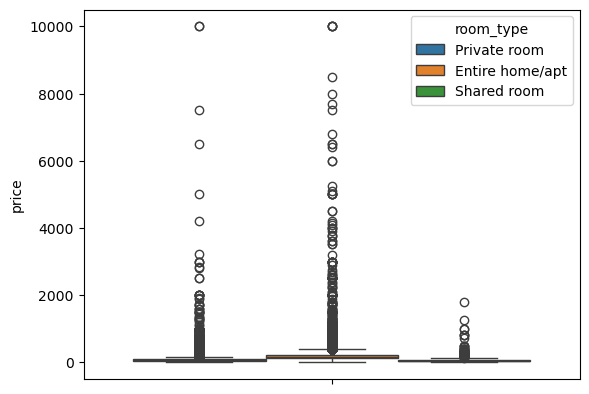

In [8]:
sns.boxplot(df, hue='room_type', y='price')

<Axes: xlabel='room_type', ylabel='count'>

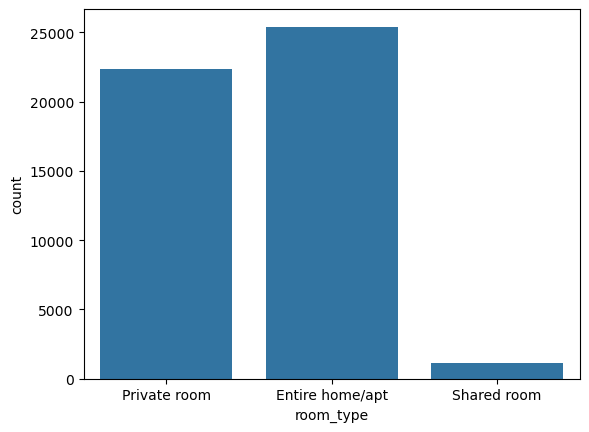

In [9]:
sns.countplot(df, x='room_type')

<Axes: >

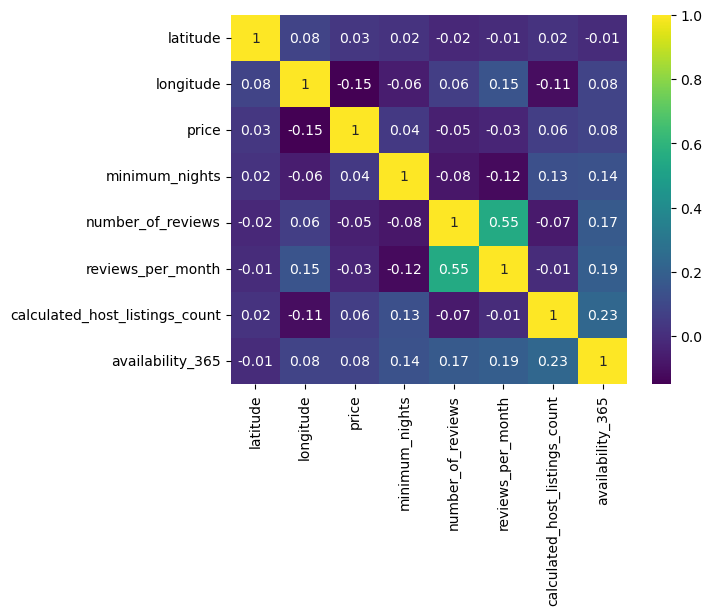

In [10]:
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='viridis')

## Creación de imputer para transformar los Nans a 0, y textos en others

In [4]:
from sklearn.impute import SimpleImputer

numerical_columns = df.select_dtypes(exclude=['object', 'category']).columns.to_list() 
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.to_list()

imputer_numerical = SimpleImputer(strategy='constant', fill_value=0)
np_numerical = imputer_numerical.fit_transform(df[numerical_columns]) 

imputer_categorical = SimpleImputer(strategy='constant', fill_value='others')
np_categorical = imputer_categorical.fit_transform(df[categorical_columns])

df_final = pd.concat(
    [
        pd.DataFrame(np_numerical, columns=numerical_columns).reset_index(drop=True), # categoricas
        pd.DataFrame(np_categorical, columns=categorical_columns).reset_index(drop=True) # numéricas
    ],
    axis=1
)
df_final.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,40.64749,-73.97237,149.0,1.0,9.0,0.21,6.0,365.0,Brooklyn,Kensington,Private room
1,40.75362,-73.98377,225.0,1.0,45.0,0.38,2.0,355.0,Manhattan,Midtown,Entire home/apt
2,40.80902,-73.94190,150.0,3.0,0.0,0.00,1.0,365.0,Manhattan,Harlem,Private room
3,40.68514,-73.95976,89.0,1.0,270.0,4.64,1.0,194.0,Brooklyn,Clinton Hill,Entire home/apt
4,40.79851,-73.94399,80.0,10.0,9.0,0.10,1.0,0.0,Manhattan,East Harlem,Entire home/apt


In [6]:
df_final.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
dtype: int64

In [7]:
from sklearn.compose import make_column_selector

# Selector de columnas numéricas
num_selector = make_column_selector(dtype_include=['number'])
columnas_numericas = num_selector(df)

# Selector de columnas categóricas
cat_selector = make_column_selector(dtype_include=['object', 'category'])
columnas_categoricas = cat_selector(df)

print("Columnas Numéricas:", columnas_numericas)
print("Columnas Categóricas:", columnas_categoricas)

Columnas Numéricas: ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Columnas Categóricas: ['neighbourhood_group', 'neighbourhood', 'room_type']


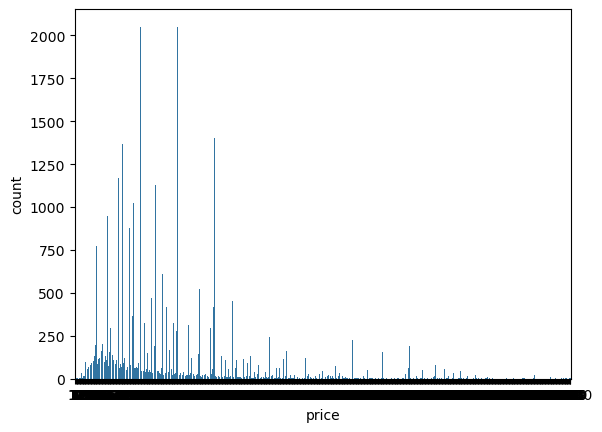

In [ ]:
sns.countplot(df, x='price');

In [8]:
# sns.pairplot(df_imputed)

In [8]:

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# Separación X y Y
X = df_final[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df_final['price']

# DataFrame de resultados

df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])

# REGRESIÓN LINEAL MÚLTIPLE
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) 

df_resultados.loc[len(df_resultados)] = ['RML 8 col', r2, mae, rmse,mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RML 8 col,0.01324,91.175468,238.556558,1.503329e+14


In [9]:
# Particionamiento para Regresión lineal múltiple
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) 

df_resultados.loc[len(df_resultados)] = ['RLM 10 col (test)', r2, mae, rmse, mape]
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
0,RML 8 col,0.013240,91.175468,238.556558,1.503329e+14
1,RLM 10 col (test),0.013002,88.333769,208.957039,1.260488e+14


In [10]:
X = df_final[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df_final['price']

X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

df_resultados = pd.DataFrame(columns=['Modelo', 'Preprocesados', 'R2', 'MAE','RMSE','MAPE'])

def calculate_metrics(prepreocesados_name, x_train, x_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(),
        'SVR': SVR(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42)
        
    }
    
    for model_name, model in models.items():
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        df_resultados.loc[len(df_resultados)] = [model_name, prepreocesados_name,
                                                r2_score(y_test, y_pred), 
                                                 mean_absolute_error(y_test, y_pred),
                                                 root_mean_squared_error(y_test, y_pred),
                                                 mean_absolute_percentage_error(y_test, y_pred)
                                ]
    return df_resultados.sort_values('R2', ascending=False)

In [11]:
calculate_metrics(' Sin preprocesados', X_train,X_test,y_train, y_test)

,Modelo,Preprocesados,R2,MAE,RMSE,MAPE
0,LinearRegression,Sin preprocesados,0.013002,88.333769,208.957039,1.260488e+14
2,SVR,Sin preprocesados,-0.030714,78.556052,213.534435,1.017555e+14
4,RandomForest,Sin preprocesados,-0.134113,90.125483,223.989200,7.710785e+13
1,KNN,Sin preprocesados,-0.218922,94.636568,232.213134,1.125555e+14
3,DecisionTree,Sin preprocesados,-1.167559,108.649642,309.659440,6.908068e+13


In [12]:


X = df_final[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df_final[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Filtrar outliers manualmente con Pandas y el método tukey IQR
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 -1.5 *IQR  # LÍMITE INFERIOR
upper_bound = Q1 +1.5 *IQR  # Limite Superior

filtro = ~((X_train < lower_bound) | (X_train > upper_bound)).any(axis=1)
x_train_filter = X_train[filtro]
y_train_filter = y_train[filtro]


filtro = ~((X_test < lower_bound) | (X_test > upper_bound)).any(axis=1)
x_test_filter = X_test[filtro]
y_test_filter = y_test[filtro]

calculate_metrics('Outliers IQR', x_train_filter, x_test_filter, y_train_filter, y_test_filter)

d:\Nueva carpeta\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Nueva carpeta\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Modelo,Preprocesados,R2,MAE,RMSE,MAPE
0,LinearRegression,Sin preprocesados,0.013002,88.333769,208.957039,1.260488e+14
5,LinearRegression,Outliers IQR,0.006319,84.433775,208.144918,1.017252e+14
2,SVR,Sin preprocesados,-0.030714,78.556052,213.534435,1.017555e+14
7,SVR,Outliers IQR,-0.032618,77.684378,212.183771,9.921349e+13
9,RandomForest,Outliers IQR,-0.091197,90.894927,218.119226,1.079072e+14
6,KNN,Outliers IQR,-0.127444,93.357998,221.712335,9.402511e+13
4,RandomForest,Sin preprocesados,-0.134113,90.125483,223.989200,7.710785e+13
1,KNN,Sin preprocesados,-0.218922,94.636568,232.213134,1.125555e+14
8,DecisionTree,Outliers IQR,-0.254490,102.662135,233.870765,9.236258e+13
3,DecisionTree,Sin preprocesados,-1.167559,108.649642,309.659440,6.908068e+13


# Carga de datos para realizar preprocesados

In [14]:
df = pd.read_csv('/Users/varso/MODULO5.0/Data/AB_NYC_2019.csv')
df.drop(['id', 'host_id', 'host_name','last_review'], axis=1, inplace=True)
names = df['name']
df.drop('name', axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Transformación Logarítmica

In [15]:
df['price_log'] = np.log1p(df['price'])
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.010635
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5.420535
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,5.017280
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,4.499810
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.394449


In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR

filtro = ~((df['price'] < lower_bound) | (df['price'] > upper_bound))

df_out = df[filtro]

Q1 = df['price_log'].quantile(0.25)
Q3 = df['price_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR

filtro = ~((df['price_log'] < lower_bound) | (df['price_log'] > upper_bound))

df_log = df[filtro]

print('original sin outlier: ', df_out.shape)
print('logaritmica sin outlier: ', df_log.shape)

original sin outlier:  (45923, 12)
logaritmica sin outlier:  (48258, 12)


## Regresión

In [17]:
X = df_out.drop(['price', 'price_log'], axis=1)
y = df_out['price']

X_log = df_log.drop(['price', 'price_log'], axis=1)
y_log = df_log['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.20, random_state=42)

In [18]:
numerical_col = X_train.select_dtypes(include=[np.number]).columns.to_list()
categorical_col = X_train.select_dtypes(exclude=[np.number]).columns.to_list()

print('Columnas numericas', numerical_col)
print('Columnas categoricas', categorical_col)

Columnas numericas ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Columnas categoricas ['neighbourhood_group', 'neighbourhood', 'room_type']


## Pipeline

In [19]:


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


df_resultados = pd.DataFrame(columns=['Modelo','R2', 'MAE', 'RMSE', 'MAPE'])

pipeline_categorical = Pipeline([
                ('imputer', SimpleImputer(strategy='constant')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
            ])

pipeline_numerical = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
])
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerical, numerical_col),
    ('categorical', pipeline_categorical, categorical_col)
])
pipeline = Pipeline([
    ('pipeline', pipeline_all),
    ('modelo', LinearRegression())]
)
pipeline.fit(X_train_log, y_train_log)
y_pred = pipeline.predict(X_test_log)

r2 = r2_score(y_test_log, y_pred)
mae = mean_absolute_error(y_test_log, y_pred)
rmse = root_mean_squared_error(y_test_log, y_pred)
mape = mean_absolute_percentage_error(y_test_log, y_pred)
df_resultados.loc[len(df_resultados)] = [f'LR Standar S con y log', r2, mae, rmse, mape]

df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,LR Standar S con y log,0.584603,0.313563,0.410583,0.066901


In [25]:
from sklearn.preprocessing import QuantileTransformer


modelos = {
    'RF' : RandomForestRegressor(max_depth=10, random_state=42),
    'SVR RBF' : SVR(kernel='rbf'),
}

pipeline_categorical = Pipeline([
                ('imputer', SimpleImputer(strategy='constant')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
            ])

for nombre_modelo, modelo in modelos.items():
    pipeline_numerical = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', RobustScaler()),
        ('transformer', QuantileTransformer()),
    ])
    pipeline_all = ColumnTransformer([
        ('numeric', pipeline_numerical, numerical_col),
        ('categorical', pipeline_categorical, categorical_col)
    ])
    pipeline = Pipeline([
        ('pipeline', pipeline_all),
        ('modelo', modelo)]
    )
    pipeline.fit(X_train_log, y_train_log)
    y_pred = pipeline.predict(X_test_log)
    
    r2 = r2_score(y_test_log, y_pred)
    mae = mean_absolute_error(y_test_log, y_pred)
    rmse = root_mean_squared_error(y_test_log, y_pred)
    mape = mean_absolute_percentage_error(y_test_log, y_pred)
    df_resultados.loc[len(df_resultados)] = [f'RobustS QuantileT {nombre_modelo}', r2, mae, rmse, mape]
    print(f'{nombre_modelo}')
        
df_resultados.sort_values('R2', ascending=False).head(10)

RF
SVR RBF


,Modelo,R2,MAE,RMSE,MAPE
1,RobustS QuantileT RF,0.650346,0.286183,0.376693,0.060965
2,RobustS QuantileT SVR RBF,0.633647,0.289471,0.385584,0.061186
0,LR Standar S con y log,0.584603,0.313563,0.410583,0.066901


# Variación cruzada

In [26]:
from sklearn.model_selection import cross_validate


pipeline_categorical = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
            ])

pipeline_numerical = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', RobustScaler()),
    ('transformer', QuantileTransformer())
])
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerical, numerical_col),
    ('categorical', pipeline_categorical, categorical_col)
])

pipeline_linear = Pipeline([
    ('pipeline', pipeline_all),
    ('modelo', LinearRegression())]
)

pipeline_KNN = Pipeline([
    ('pipeline', pipeline_all),
    ('modelo', KNeighborsRegressor())]
)

pipeline_RF = Pipeline([
    ('pipeline', pipeline_all),
    ('modelo', RandomForestRegressor(max_depth=10,random_state=42))]
)

models = {
    'LinearRegression': pipeline_linear,
    'KNN': pipeline_KNN,
    'RandomForest': pipeline_RF
}

df_list = []
for name, model in models.items(): 
    
    results = cross_validate(model, X_log, y_log, cv=5, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'])
    df_model = pd.DataFrame(results)
    df_model['modelo'] = name
    df_list.append(df_model)

df_resultados_cross = pd.concat(df_list, ignore_index=True) 

In [27]:
df_resultados_cross.sort_values('test_r2', ascending=False).head(5)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_mean_absolute_percentage_error,test_neg_root_mean_squared_error,modelo
13,46.872089,0.139030,0.641182,-0.296920,-0.153346,-0.063430,-0.391594,RandomForest
14,47.034310,0.129528,0.631205,-0.331227,-0.182937,-0.069923,-0.427712,RandomForest
4,0.437327,0.040009,0.623587,-0.336471,-0.186717,-0.071134,-0.432107,LinearRegression
11,48.931503,0.182071,0.608957,-0.290685,-0.146271,-0.062289,-0.382454,RandomForest
12,53.475857,0.135535,0.608409,-0.297993,-0.152743,-0.064736,-0.390823,RandomForest


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, RFE, RFECV
from sklearn.feature_selection import f_classif, chi2, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split